### Анализ данных компьютерных игр для выявления факторов, влияющих на успех

#### Цель и задача проекта
Проанализировать объявления о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Изучить параметры квартир и определить, какие факторы влияют на стоимость квартиры.

In [1]:
# загрузка необходимых библиотек для работы
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

%matplotlib inline

### Шаг 1. Откройте файл с данными и изучите общую информацию

In [2]:
games_data = pd.read_csv('/datasets/games.csv') # чтение данных

In [3]:
games_data.sample(10) # вывод 10 случайных строк из датасета

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16238,Fernbus Simulator,PC,2016.0,Simulation,0.00,0.01,0.00,0.00,NaN,tbd,NaN
12750,Kamen Rider Kabuto,PS2,2006.0,Action,0.00,0.00,0.06,0.00,NaN,NaN,NaN
10640,International Superstar Soccer 64 (weekly JP s...,N64,1997.0,Sports,0.00,0.00,0.05,0.05,NaN,NaN,NaN
5903,Sword Art Online: Hollow Fragment,PSV,2014.0,Role-Playing,0.00,0.00,0.30,0.00,67.0,7.6,T
12455,The LEGO Movie Videogame,PC,2014.0,Action,0.02,0.04,0.00,0.00,68.0,6.8,E10+
11813,Blood Drive,PS3,2010.0,Racing,0.07,0.00,0.00,0.01,47.0,7,M
1645,Golden Sun: The Lost Age,GBA,2002.0,Role-Playing,0.61,0.27,0.27,0.07,86.0,9.5,E
5598,Beautiful Katamari,X360,2007.0,Puzzle,0.14,0.02,0.15,0.02,73.0,7,E
14902,Aegis of Earth: Protonovus Assault,PS4,2016.0,Action,0.02,0.00,0.00,0.00,57.0,7.8,T
2750,Spectrobes,DS,2007.0,Role-Playing,0.66,0.02,0.00,0.06,63.0,7.9,E


In [4]:
games_data.info() # ифнормация о датасете и о типе данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
games_data.describe() # математические характеристики столбцов с числовым типом данных

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
print('В датасете повторяющихся элементов', games_data.duplicated().sum(), 'строк.')

В датасете повторяющихся элементов 0 строк.


#### Вывод
- Данные были успешно загружены и изучены. 
- Были обнаружены пропуски в столбцах с названием игры(2), год выпуска(269), жанр(2), оценка критиков(8578), оценка пользователей(6701), возрастной рейтинг(6769)
- Несоответствие типа данных к описываемой характеристике - оценка пользователей
- Датасет не содержит дубликатов

### Шаг 2. Подготовьте данные

##### Перевод названий столбцов в нижний регистр

In [7]:
games_data.columns = map(str.lower, games_data.columns) # перевод названий столбцов в нижний регистр
games_data.columns # печать столбцов после перевода

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

##### Перевод данных в нужные типы.
- год выпуска игры с вещественного(float) на целочисленный(integer)
- рейтинг пользователей с строчного(object) на вещественный(float)

In [8]:
# перевод типа данных в дате релиза без учета пропущенных значений
games_data['year_of_release'] = games_data['year_of_release'].fillna(-1).astype('int')

Альтернативным вариантом будет:
- заполнение пропусков на какое то одно отрицательное число, в дальнейшем при работе надо будет делать срез без их учета
    games_data['year_of_release'].fillna(-0.1, inplace=True)

В столбце с оценкой пользователей встречается аббревиатура ['TBD'](https://dictionary.cambridge.org/ru/%D1%81%D0%BB%D0%BE%D0%B2%D0%B0%D1%80%D1%8C/%D0%B0%D0%BD%D0%B3%D0%BB%D0%B8%D0%B9%D1%81%D0%BA%D0%B8%D0%B9/tbd), что означает 'to be determined' - будет определено. 

In [9]:
# замена tbd на nan
games_data.loc[games_data['user_score'] == 'tbd', 'user_score'] = np.nan 

In [10]:
# перевод в числовой тип данных без учета пропущенных значений
games_data['user_score'] = games_data['user_score'].dropna().astype('float')

In [11]:
# проверка 
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16715 non-null int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Год выпуска игры отображается как 'float64', в связи с тем, что при переводе типа данных мы не трогали пропущенные значения 'NaN', что python воспринимает как [вещественный тип данных.](https://pandas.pydata.org/pandas-docs/stable/user_guide/integer_na.html)

##### Обработка пропущенных значений

Из вывода предыдущего шага пропуски есть в столбцах с названием игры(2), год выпуска(269), жанр(2), оценка критиков(8578), оценка пользователей(6701), возрастной рейтинг(6769)

In [12]:
# посмотрим на игры с пропущенным названием
games_data.query('name == "NaN"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Видно, что не только название игры отсутствует, но и вся строка. Эти 2 строки выбросим из датасета. Получается этим мы еще избавимся от пропусков в столбце с жанром игры.

In [13]:
# удаляем строки с прощенным названием игры
games_data.dropna(subset=['name'], inplace=True)

Пропуски в оценке критиков и пользователей, а так же возрастной рейтинг игры нельзя достоверно заполнить. Рекомендую оставить пропуски как есть или заменить на отрицательное число, которое в дальнейшем при анализе не будет учитываться.

##### Столбец для суммарных продаж

In [14]:
# создаем столбец с общим объемом продаж и печатаем первые 5 строк новой таблицы
games_data['total_sales'] = games_data['na_sales'] + games_data['eu_sales'] + games_data['jp_sales']
games_data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,39.47
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,30.38


#### Вывод
- заменили тип данных в столбцах с годом выпуска игры и рейтнигом пользователей
- избавились от 2 строк, которые оказались полностью пустыми
- пропуски в столбцах с оценками и возрастным рейтингом не стали заполнять, так как 100% восстановить их невозможно, а заменять на мат.среднюю или медиану будет некорректно
- причинами возникновения пропусков в датасете могут быть: технические факторы - неправильная обработка данных от нескольких ресурсов или потеря данных при склеивании нескольких датасетов

### Шаг 3. Исследовательский анализ данных

##### Подсчет количества игр по годам

In [15]:
# сводная таблица для кол-ва игр по годам
games_per_year = games_data.pivot_table(index='year_of_release', values='total_sales', aggfunc='count')
games_per_year.columns = ['games_in_year']

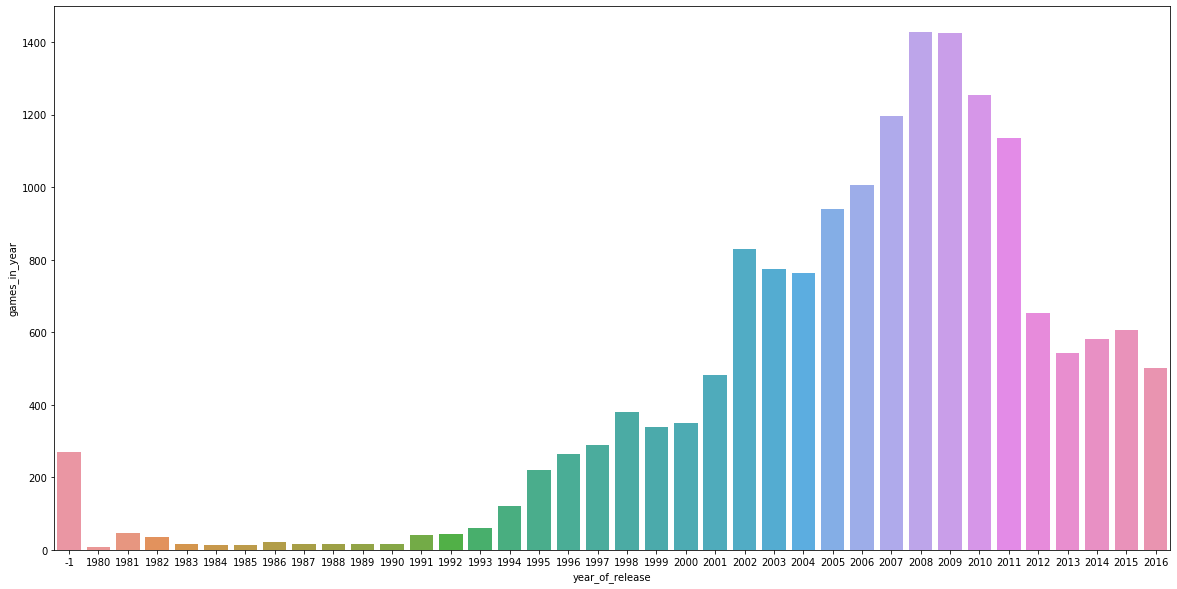

In [17]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x=games_per_year.index, y="games_in_year", data=games_per_year) # график с помощью библ.seaborn

Можно отметить, что игры выпущенные до 1994 года можно не учитывать, т.к. их количество мало и разница между 94 и 93 годами практически в 2 раза. Так же стоит не забывать, "-1" это мы так промаркировали пропущенные значения. 

Увидели на графиках, посмотрим теперь на это в виде таблице с цифрами.

In [18]:
games_data.groupby(['year_of_release'])['name'].count() # подсчет игр по годам и печать 

year_of_release
-1        269
 1980       9
 1981      46
 1982      36
 1983      17
 1984      14
 1985      14
 1986      21
 1987      16
 1988      15
 1989      17
 1990      16
 1991      41
 1992      43
 1993      60
 1994     121
 1995     219
 1996     263
 1997     289
 1998     379
 1999     338
 2000     350
 2001     482
 2002     829
 2003     775
 2004     762
 2005     939
 2006    1006
 2007    1197
 2008    1427
 2009    1426
 2010    1255
 2011    1136
 2012     653
 2013     544
 2014     581
 2015     606
 2016     502
Name: name, dtype: int64

Действительно, в 1993 году было выпущено - 60 игр, а в 1994 - 121. Поэтому для дальнейшего исследования важно учитывать данные с 1994.

In [19]:
games_data = games_data.query('1994 <= year_of_release') # сделаем срез, начиная с 1994г

##### Посмотрим, как менялись продажи по платформам. Выберим платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [20]:
games_data.groupby(['platform'])['total_sales'].sum().sort_values(ascending=False) # общие продажи по платформам

platform
PS2     1043.09
X360     876.36
Wii      813.47
PS3      796.75
DS       743.72
PS       686.89
GBA      305.27
PS4      265.79
PSP      248.77
3DS      244.54
XB       243.09
PC       230.91
N64      213.70
GC       191.60
GB       146.50
XOne     145.05
SNES      83.77
WiiU      76.24
PSV       47.38
SAT       33.52
DC        15.68
GEN        7.82
WS         1.42
NG         1.23
SCD        0.36
TG16       0.16
NES        0.11
3DO        0.10
PCFX       0.03
Name: total_sales, dtype: float64

In [21]:
# возьмем лучшие платформы до свежего XBOX One
top_platforms = ['PS2', 'X360', 'Wii', 'PS3', 'DS', 'PS', 'GBA', 'PS4', 'PSP', '3DS', 'XB', 'PC', 'N64', 'GC', 'GB', 'XOne']
top_platforms

['PS2',
 'X360',
 'Wii',
 'PS3',
 'DS',
 'PS',
 'GBA',
 'PS4',
 'PSP',
 '3DS',
 'XB',
 'PC',
 'N64',
 'GC',
 'GB',
 'XOne']

Тут было решено взять срез лучших платформ до XOne, в связи с тем что в дальнейшем нам надо искать актуальный период. А из последних платформ это PS4 и XOne.

In [22]:
games_top = games_data.query('platform == @top_platforms') # срез по топ платформам

In [23]:
# сводная таблица по топ платофрмам
top_data = games_top.pivot_table('total_sales', ['platform', 'year_of_release'],aggfunc=sum)
top_data.head(5)

total_sales
platform year_of_release             
3DS      2011                   58.80
         2012                   48.77
         2013                   53.97
         2014                   41.75
         2015                   26.75

In [24]:
top_data = top_data.reset_index() # обновим индексы для корректной рисовки графиков

In [25]:
top_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 3 columns):
platform           154 non-null object
year_of_release    154 non-null int64
total_sales        154 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.7+ KB


Text(0.5, 1.0, 'Общие продажи на топ-10 платформах в 1994-2016 гг')

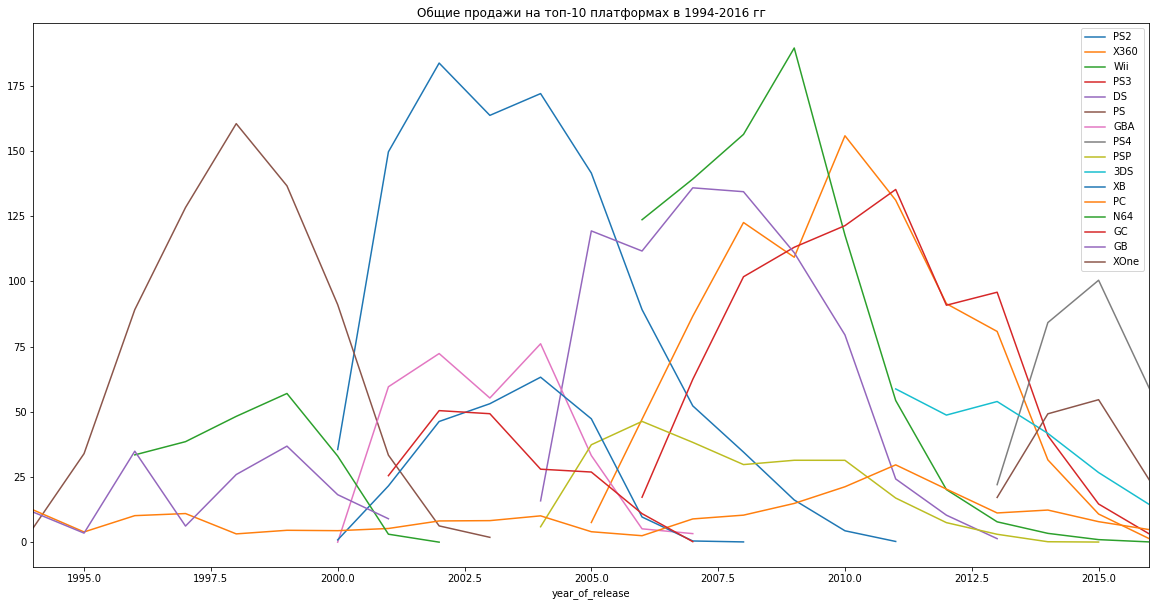

In [26]:
fig, ax = plt.subplots() # формирование тенденций продаж на разных игровых платформах и интервале времени 94-16 гг
for col in top_platforms:
    y = top_data.query('platform == @col')
    y.plot(x = 'year_of_release', y = 'total_sales', figsize=(20, 10), ax=ax)
ax.legend(top_platforms)   
plt.title('Общие продажи на топ-10 платформах в 1994-2016 гг')

Из графика можно увидеть(конечно сложно, но если приглядеться), что средний жизненный цикл игровой платформы составляет примерно 7,5лет.

#### Возьмите данные за соответствующий актуальный период. 

Для оценки рынка на 2017 выберем актуальный период 2013 - 2016 года. (Именно в 13году выходят консоли нового поколения, а старые уходят из рынка)

In [27]:
data_actual = games_top.query('2013 <= year_of_release') # срез данных по актуальному периоду 13-16 гг
data_actual.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,17.09
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,14.86
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,12.25
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,13.82
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,10.65
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,10.94
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,9.33
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,8.11
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,NaN,NaN,NaN,8.37
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,7.30


#### Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

In [28]:
data_actual.groupby(['platform'])['total_sales'].sum().sort_values(ascending=False)

platform
PS4     265.79
PS3     154.66
XOne    145.05
3DS     136.97
X360    124.69
PC       36.47
Wii      12.54
PSP       3.46
DS        1.42
Name: total_sales, dtype: float64

PSP - форева!

In [29]:
# актуальные платформы для среза
platforms_actual = ['PS4', 'PS3', 'XOne', '3DS', 'X360', 'PC', 'Wii', 'PSP', 'DS']

In [30]:
data_actual_platforms = games_top.query('platform == @platforms_actual') # срез по актуальным игровым платформам

In [31]:
data_actual = data_actual_platforms.pivot_table('total_sales', ['platform', 'year_of_release'],aggfunc=sum) 

In [32]:
data_actual = data_actual.reset_index()

Text(0.5, 1.0, 'Поведение продаж на топ игровых платформах в интервале 13-16 гг')

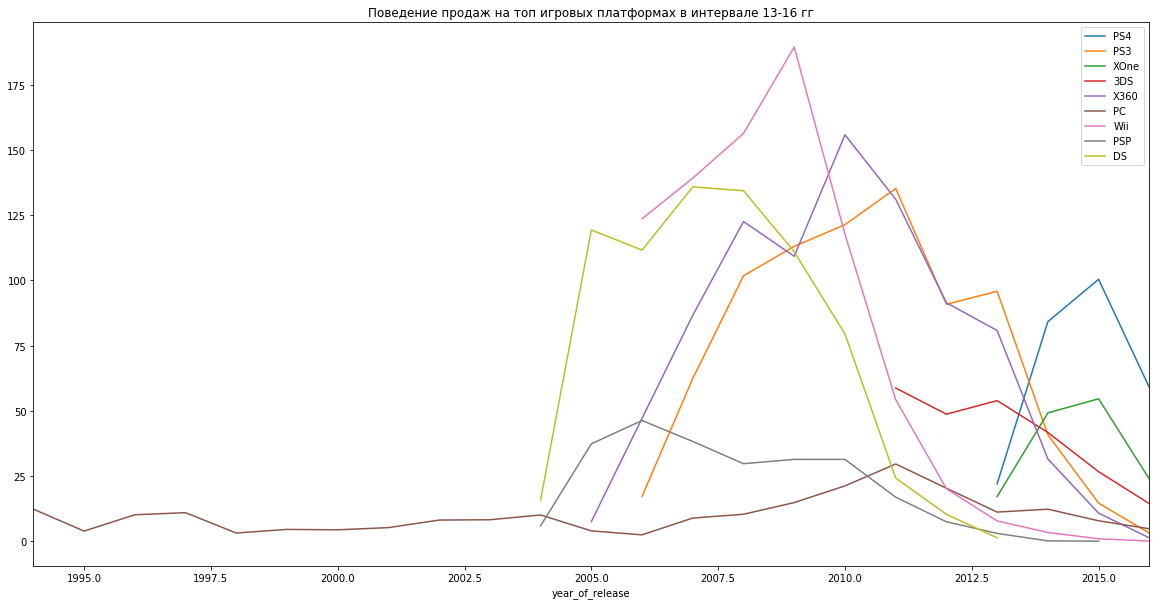

In [33]:
ax = plt.gca()
for col in platforms_actual: # временное семество графиков продаж по игровым платформам 
    y = data_actual.query('platform == @col')
    y.plot(x = 'year_of_release', y = 'total_sales', figsize=(20, 10), ax=ax)
ax.legend(platforms_actual)   
plt.title('Поведение продаж на топ игровых платформах в интервале 13-16 гг')

PC - "долгоиграющая" классика, самые стабильные продажи; с небольшим скачком продаж в 2011 году. "Старушки" платформы уходят в закат, а новые PS4 и XOne захватывают рынок. P.S. а где Switch?

#### Построим график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? 

In [34]:
data = games_data.query('2013 <= year_of_release')

In [35]:
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,17.09
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,14.86
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,12.25
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,13.82
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,10.65


In [36]:
data_agg = data.groupby('name')['platform'].count() # группировка игр по мультиплатформенности
data_agg = pd.DataFrame(data_agg)
data_agg.reset_index(inplace=True)
data_agg.tail(1)

,name,platform
1262,inFAMOUS: Second Son,1


Text(0.5, 1.0, 'Распределение продаж мультиплатформенных игр')

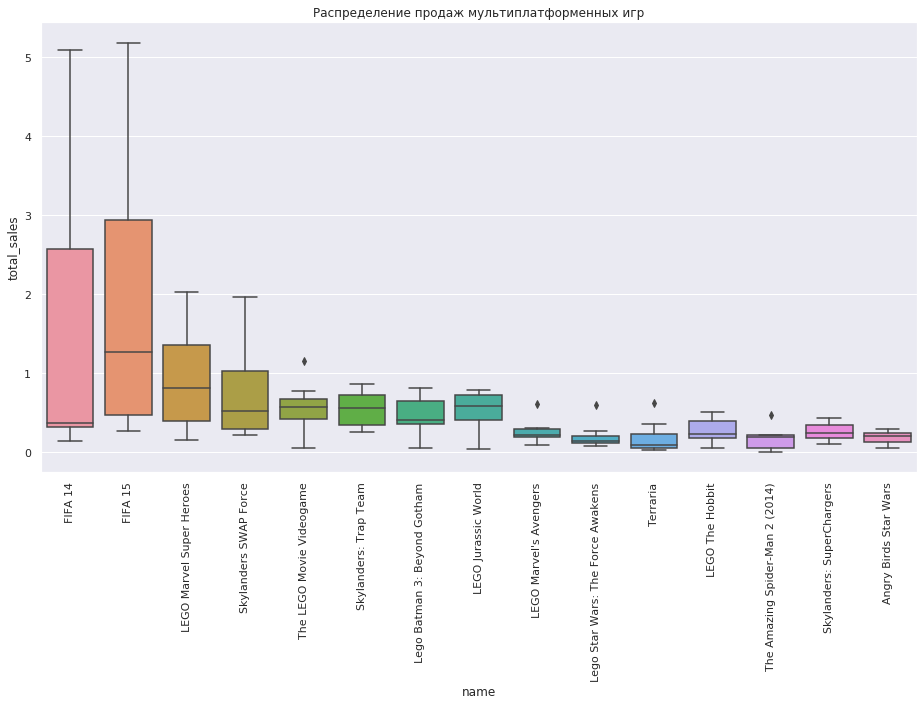

In [37]:
# сторим график распределения мультиплатформенных(=>7 платформ) игр
name_filter = data_agg.query('platform >=7')['name'].values.tolist() 
sns.set(rc={'figure.figsize':(15.7,8.27)})
ax = sns.boxplot(x="name", y="total_sales", data=data.query('@name_filter in name'))
plt.xticks(rotation=90)
plt.title('Распределение продаж мультиплатформенных игр')

- Серия FIFA хорошо продается среди всех мультиплатформенных игр
- средние показатели продаж копий ниже 1 млн.экземпляров для мультиплатформенных игр

#### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

In [38]:
data.head(1) # выберем 1 платформу - PS3

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,17.09


In [40]:
platforms_actual

['PS4', 'PS3', 'XOne', '3DS', 'X360', 'PC', 'Wii', 'PSP', 'DS']

In [44]:
df_ps3 = data.query('platform == "PS3"') # срез по платформе PS3

Text(0.5, 1, 'Распределение продаж на платформе XOne в зависимости от оценки критиков')

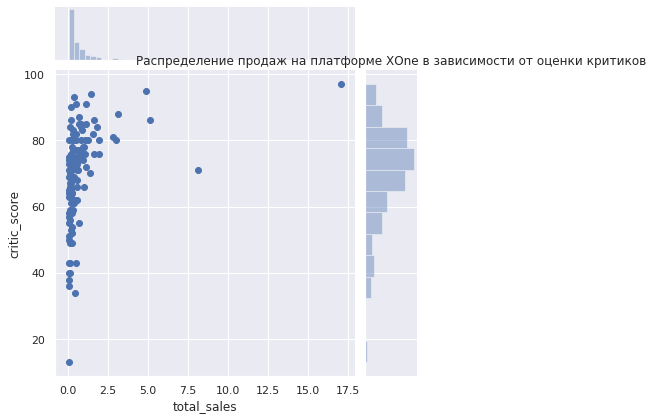

In [46]:
sns.jointplot(x='total_sales', y='critic_score', data=df_ps3) # построение распределения продаж относительно оценки критиков
plt.title('Распределение продаж на платформе PS3 в зависимости от оценки критиков')

<font color='brown'>Зависимую величину (в данном случае продажи) принято отображать на оси y. Лучше следовать этому принципу.

Text(0.5, 1, 'Распределение продаж на платформе PS3 в зависимости от оценки пользователей')

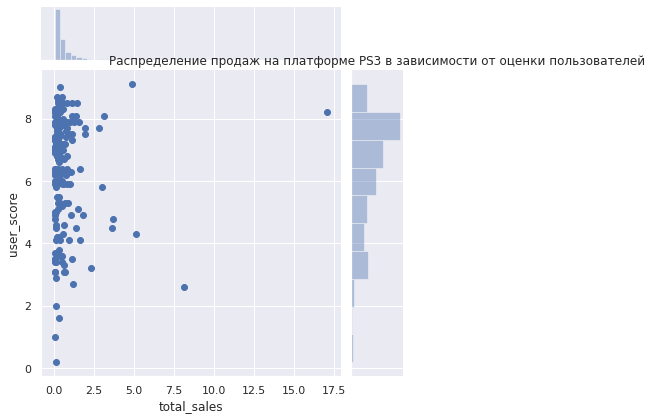

In [48]:
sns.jointplot(x='total_sales', y='user_score', data=df_ps3) # построение распределения продаж относительно оценки пользователей
plt.title('Распределение продаж на платформе PS3 в зависимости от оценки пользователей')

In [49]:
corr_ps3 = df_ps3[['platform','critic_score','user_score','total_sales']].corr()

Text(0.5, 1, 'Зависимость прибыли от оценки критиков и пользователей на платформе PS3')

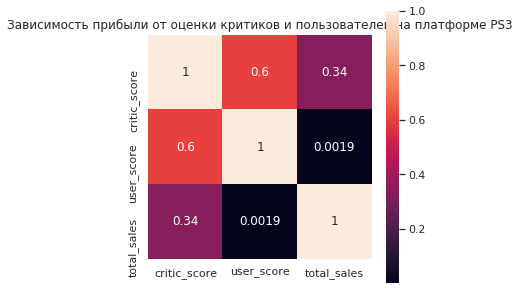

In [50]:
sns.set(rc={'figure.figsize':(5,5)})
sns.heatmap(corr_ps3, square=True,annot=True)
plt.title('Зависимость прибыли от оценки критиков и пользователей на платформе PS3')

Ситуация по конкретной игровой платформе - PS3:
1. Как мы видим из полученной информации отзывы критиков сильнее влияют на продажи, чем отзовы пользователей.
2. Люди больше доверяют экспертам, чем простым юзерам.
3. Мнения экспертов формируют тренды.
4. Но тем не менее корреляция ниже 0.5 говорит о небольшом положительном воздействии на продажи.

In [51]:
corr_all = data[['platform','critic_score','user_score','total_sales']].corr()

Text(0.5, 1, 'Зависимость прибыли от оценки критиков и пользователей на всех игровых платформах')

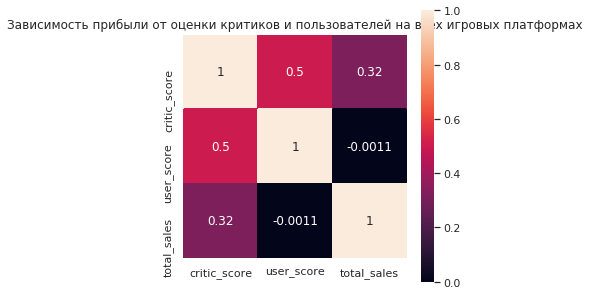

In [52]:
sns.set(rc={'figure.figsize':(5,5)})
sns.heatmap(corr_all, square=True,annot=True)
plt.title('Зависимость прибыли от оценки критиков и пользователей на всех игровых платформах')

Общая картина продаж отличается, чем для одной выбранной консоли(PS3)
- Влияние оценки экспертов практически не изменились при расммотрение всех платформ
- А вот корреляция оценки пользователей к общему количеству продаж упала и перешла в минус. Это говорит о том, что обычные люди прислушиваются к мнению экспертов и их оценке.

#### Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [53]:
data_agg_genre = data.groupby('genre')['name'].count() # группировка игр по жанрам
data_agg_genre = pd.DataFrame(data_agg_genre)
data_agg_genre.reset_index(inplace=True)

In [54]:
data_agg_sum = data.groupby('genre')['total_sales'].sum() # группировка продаж по жанрам
data_agg_sum = pd.DataFrame(data_agg_sum)
data_agg_sum.reset_index(inplace=True)

In [55]:
data_all = data_agg_genre.merge(data_agg_sum, on='genre') 

In [57]:
data_all['mean'] = data_all['total_sales'] / data_all['name'] # средние продажи по жанрам

In [58]:
data_all.sort_values(by='total_sales', axis = 0)

,genre,name,total_sales,mean
5,Puzzle,17,3.01,0.177059
11,Strategy,56,9.27,0.165536
9,Simulation,62,20.30,0.327419
1,Adventure,245,21.21,0.086571
2,Fighting,80,31.75,0.396875
6,Racing,85,35.45,0.417059
4,Platform,74,38.51,0.520405
3,Misc,155,56.73,0.366000
10,Sports,214,131.20,0.613084
7,Role-Playing,292,134.41,0.460308


- Самые продаваемые жанры: 'Action', 'Shooter'
- Не в "лидерах" по продажам, но в лидерах по прибыли такие жанры: 'Sports', 'Platform', 'Role-Playing'

### Шаг 4. Составим портрет пользователя каждого региона

In [59]:
pl_na = pd.DataFrame(data.groupby(['platform'])['na_sales'].sum().sort_values(ascending=False).head()) 
# группировка локальной прибыли по игровым платформам
pl_na.reset_index(inplace=True)

In [60]:
pl_eu = pd.DataFrame(data.groupby(['platform'])['eu_sales'].sum().sort_values(ascending=False).head())
# группировка локальной прибыли по игровым платформам
pl_eu.reset_index(inplace=True)

In [61]:
pl_jp = pd.DataFrame(data.groupby(['platform'])['jp_sales'].sum().sort_values(ascending=False).head())
# группировка локальной прибыли по игровым платформам
pl_jp.reset_index(inplace=True)

#### Самые популярные платформы (топ-5). 

In [62]:
pl_na # топ 5 игровых платформ Северная Америка

,platform,na_sales
0,PS4,108.74
1,XOne,93.12
2,X360,81.66
3,PS3,63.50
4,3DS,38.20


In [63]:
pl_eu # топ 5 игровых платформ Европпа

,platform,eu_sales
0,PS4,141.09
1,PS3,67.81
2,XOne,51.59
3,X360,42.52
4,3DS,30.96


In [64]:
pl_jp  # топ 5 игровых платформ Япония

,platform,jp_sales
0,3DS,67.81
1,PS3,23.35
2,PSV,18.59
3,PS4,15.96
4,WiiU,10.88


* В целом пользователи Северной Америки и Европы очень похожи по предпочтениям игровых платформ - PS4 и Xbox One; а вот Япония совсем другая история, связано с предпочтением азиатского потребителя - 3DS. 

In [65]:
gen_na = pd.DataFrame(data.groupby(['genre'])['na_sales'].sum().sort_values(ascending=False).head())
# группировка локальной прибыли по жанрам
gen_na.reset_index(inplace=True)

In [66]:
gen_eu = pd.DataFrame(data.groupby(['genre'])['eu_sales'].sum().sort_values(ascending=False).head())
# группировка локальной прибыли по жанрам
gen_eu.reset_index(inplace=True)

In [67]:
gen_jp = pd.DataFrame(data.groupby(['genre'])['jp_sales'].sum().sort_values(ascending=False).head())
# группировка локальной прибыли по жанрам
gen_jp.reset_index(inplace=True)

#### Самые популярные жанры (топ-5). 

In [68]:
gen_na # топ 5 жанров Северная Америка

,genre,na_sales
0,Action,126.05
1,Shooter,109.74
2,Sports,65.27
3,Role-Playing,46.40
4,Misc,27.49


In [70]:
gen_eu # топ 5 жанров Европа

,genre,eu_sales
0,Action,118.13
1,Shooter,87.86
2,Sports,60.52
3,Role-Playing,36.97
4,Racing,20.19


In [71]:
gen_jp # топ 5 жанров Япония

,genre,jp_sales
0,Role-Playing,51.04
1,Action,40.49
2,Misc,9.20
3,Fighting,7.65
4,Shooter,6.61


* По жанрам предпочтения пользоветелей Европпы и Северной Америки сходятся. Япония опять отличается, скорее всего из за отличия культуры.

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [74]:
data['rating'].unique() # уникальные значения 

array(['M', nan, 'E', 'T', 'E10+'], dtype=object)

Из источника ('ESRB Rating Guide')[https://www.esrb.org/ratings-guide/] в нашей актуальной выборке есть:
- M - 'Mature' для лиц старше 17 лет
- E - 'Everyone' для всех
- T - 'Teen' для лиц старше 13 лет
- E10 - 'Everyone10' для всех лиц старше 10 лет

rating,E,E10+,M,T
count,134.000000,101.00000,162.000000,186.000000
mean,0.589925,0.53703,1.019815,0.267688
std,1.147274,0.92386,2.502308,0.654437
min,0.000000,0.00000,0.000000,0.000000
25%,0.020000,0.01000,0.060000,0.010000
50%,0.150000,0.15000,0.275000,0.060000
75%,0.525000,0.50000,0.940000,0.170000
max,5.840000,4.47000,23.840000,6.620000


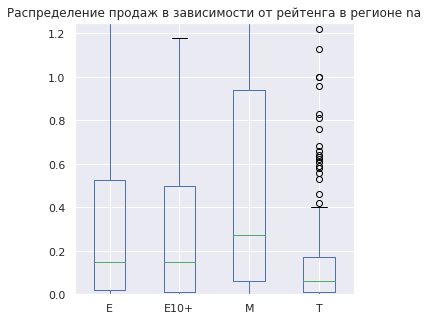

In [75]:
plt.ylim(0,1.25)
data_raiting_na = data.pivot_table(index='name',columns='rating',values='na_sales',aggfunc='sum')
data_raiting_na.boxplot()
plt.title('Распределение продаж в зависимости от рейтенга в регионе na')
data_raiting_na.describe()

rating,E,E10+,M,T
count,134.000000,101.000000,162.000000,186.000000
mean,0.622090,0.422673,0.897037,0.225538
std,1.817864,0.667101,2.233761,0.478812
min,0.000000,0.000000,0.000000,0.000000
25%,0.050000,0.020000,0.030000,0.010000
50%,0.150000,0.120000,0.265000,0.050000
75%,0.525000,0.480000,0.870000,0.197500
max,12.020000,3.620000,23.420000,3.980000


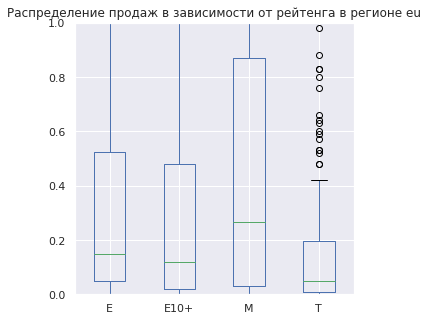

In [76]:
plt.ylim(0,1)
data_raiting_eu = data.pivot_table(index='name',columns='rating',values='eu_sales',aggfunc='sum')
data_raiting_eu.boxplot()
plt.title('Распределение продаж в зависимости от рейтенга в регионе eu')
data_raiting_eu.describe()

rating,E,E10+,M,T
count,134.000000,101.000000,162.000000,186.000000
mean,0.112985,0.058317,0.087099,0.110699
std,0.254550,0.166067,0.159131,0.227506
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.030000,0.050000
75%,0.087500,0.060000,0.100000,0.150000
max,1.400000,1.460000,1.420000,2.620000


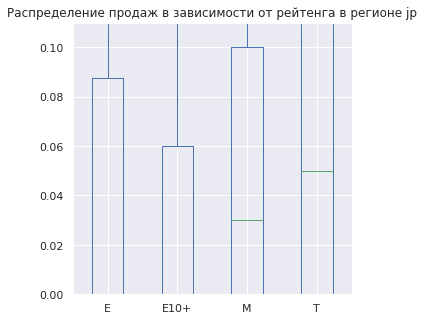

In [77]:
plt.ylim(0,0.11)
data_raiting_jp = data.pivot_table(index='name',columns='rating',values='jp_sales',aggfunc='sum')
data_raiting_jp.boxplot()
plt.title('Распределение продаж в зависимости от рейтенга в регионе jp')
data_raiting_jp.describe()

Опять "двадцать пять" - в Северной Америке и Европе картины практически идентичны - больше продаются игры с возрастным рейтингом "M", а вот в Японии "T". Японцы больше любят игры для тинейджеров, когда в остальном мире больше предпочитают "взрослые" категории игры.

### Шаг 5. Проверьте гипотезы

##### Гипотеза 1.
- H0  — средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- H1 — средние пользовательские рейтинги платформ Xbox One и PC различаются.
- aplha = 5%

In [92]:
# проверка гипотезы 1
xone = data.query('platform == "XOne"')['user_score']
xone = xone.dropna()
pc = data.query('platform == "PC"')['user_score']
pc = pc.dropna()

alpha = .05

results = st.ttest_ind(
    xone, 
    pc, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Проверим на сколько отличаются средние рейтинги пользователей PC и XOne.

In [94]:
# сводная таблица для сравнения оценок в нашем актуальном датасете
xone_pc = data.query('platform == "XOne" or platform == "PC"')
xone_pc.pivot_table(index='platform', values='user_score', aggfunc='mean')

,user_score
platform,
PC,6.269677
XOne,6.521429


Действительно, средние оценки пользователей ПК и XOne практически совпадают.

##### Гипотеза 2.
- H0  — средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») одинаковые;
- H1 — средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.
- alpha = 5%

In [97]:
action = data.query('genre == "Action"')['user_score']
action = action.dropna()
sports = data.query('genre == "Sports"')['user_score']
sports = sports.dropna()

alpha = .05

results = st.ttest_ind(
    action, 
    sports, 
    equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Проверим на сколько отличаются средние рейтинги пользователей для жанров "Action" и "Sports".

In [98]:
# сводная таблица для сравнения оценок в нашем актуальном датасете
act_sports = data.query('genre == "Action" or genre == "Sports"')
act_sports.pivot_table(index='genre', values='user_score', aggfunc='mean')

,user_score
genre,
Action,6.837532
Sports,5.238125


Cредние оценки пользователей для жанров "Action" и "Sports" сильно отличаются.

### Общие выводы

- Сев.Америка и Европа - имеют схожий вкус как к платформам(PS4, XOne), так и к жанрам игр(Action, Shooter).
- В Европе и Америке пользуются большой популярностью игры с возрастным рейтингом "М", это и очевидно по их любимым жанрам shooter и action, которые сами по себе подразумевают наличие насилия и крови.
- Япония - отдельная история; общая картина поведения пользователя в разы отличается от остального мира. 
- Популярная платформа в Японии - 3DS(JRPG рулят, наверное), популярный возрастной рейтинг - "T"(подростки). 
- В Европе и Сев.Америке игрокам подавай кровь и оружие, а самураю дай отыграть за фермера или половить покемонов.
- Как показало исследование, на продажу игр оценки пользователей никак не влияют; им важны мнение экспертов.(для меня, например, наоборот). 